# <center>ĐỒ ÁN THỰC HÀNH #1: PHÂN TÍCH DỮ LIỆU ỨNG DỤNG</center>

| MSSV     | Họ và tên         | Đánh giá |
|----------|-------------------|----------|
| 19120539 | Vương Thế Khang   | 100%     |
| 19120555 | Nguyễn Chánh Kiệt | 100%     |
| 19120652 | Nguyễn Trọng Thái | 100%     |
| 19120699 | Ngô Mậu Trường    | 100%     |

**Link colab:** https://colab.research.google.com/drive/15gdV4tEqhxQuPf0RfTiT3JSQApjdsbwW?usp=sharing

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Quan sát và mô tả dữ liệu

Đầu tiên, ta sẽ xem thử bộ dữ liệu trông như thế nào. Đọc dữ liệu từ file "AB_NYC_2019.csv" và lưu vào 2 dataframe `df`.

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 1. Cho biết kiểu dữ liệu của các thuộc tính

Xem thử kiểu dữ liệu của các cột dữ liệu.

In [3]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Có vẻ các cột đều có kiểu dữ liệu phù hợp. Nếu trong quá trình phân tích dữ liệu cần phải thay đổi kiểu dữ liệu của các cột thì ta sẽ quay lại tiền xử lý ở đây, tạm thời ta chấp nhận kiểu dữ liệu hiện tại của các cột.

### 2. Đối với cột Price, cho biết

Xem thử các loại phòng có trong tập dữ liệu.

In [4]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Quan sát thấy tập dữ liệu có nhiều loại phòng, mà mỗi loại phòng có thể ảnh hưởng đến giá phòng khác nhau. Do vậy, ta sẽ chia tập dữ liệu trên thành 3 tập dữ liệu khác nhau phân biệt giữa các loại phòng: `private_room_df`, `entire_home_df`, `shared_room_df`.

In [5]:
private_room_df = df.groupby(['room_type']).get_group('Private room')
entire_home_df = df.groupby(['room_type']).get_group('Entire home/apt')
shared_room_df = df.groupby(['room_type']).get_group('Shared room')

#### Giá phòng cao nhất, thấp nhất, giá phòng trung bình, mức giá xuất hiện nhiều

Với mỗi loại phòng, ta sẽ tính số lượng giá phòng cao nhất (max), giá phòng thấp nhất (min), giá phòng trung bình (mean) và mức giá xuất hiện nhiều (mode). Sau đó ta sẽ lưu giá trị này vào dataframe `describe_price_df` thành 4 dòng là: "max", "min", "mean", "mode".

In [6]:
describe_price_df = df.groupby(['room_type'])['price'].agg([max, min, np.mean, pd.Series.mode])
describe_price_df

,max,min,mean,mode
room_type,,,,
Entire home/apt,10000,0,211.794246,150
Private room,10000,0,89.780973,50
Shared room,1800,0,70.127586,35


Quan sát thấy tập dữ liệu có giá phòng thấp nhất là 0, trong khi trên thực tế không hề tồn tại phòng có giá tiền là 0. Do đó, ta sẽ thay thế các giá phòng là 0 thành giá phòng thấp thứ 2 trong tập dữ liệu,

In [7]:
df['price'] = df['price'].replace(df[df['price'] != 0]['price'].min())

### Độ lệch chuẩn của cột price?

In [8]:
print('Độ lệch chuẩn của giá phòng: ', df['price'].std())

Độ lệch chuẩn của giá phòng:  240.14267475025463


#### Cho biết giá phòng phân phối xung quanh trung tâm hay cách xa trung tâm? Nhận xét về giá trị mean và median của tập dữ liệu

In [9]:
df.groupby(['room_type'])['price'].agg([np.mean, np.median])

,mean,median
room_type,,
Entire home/apt,211.831398,160.0
Private room,89.813312,70.0
Shared room,70.299138,45.0


Nhận xét: Các giá trị mean lớn hơn giá trị median của tập dữ liệu. Điều này có nghĩa dữ liệu sẽ có phân phối cách xa trung tâm.

#### Vẽ đồ thị histogram để nhận xét dữ liệu có bị lệch không?

Ta sẽ vẽ biểu đồ histogram của cột "price" để thể hiện phân phối của dữ liệu. Trong đó:
- Trục hoành: các giá trị xuất hiện trong dữ liệu.
- Trục tung: tần suất xuất hiện của các giá trị đó.

Ta sẽ chia thành 100 thùng để dễ quan sát đặc trưng của biểu đồ histogram hơn.

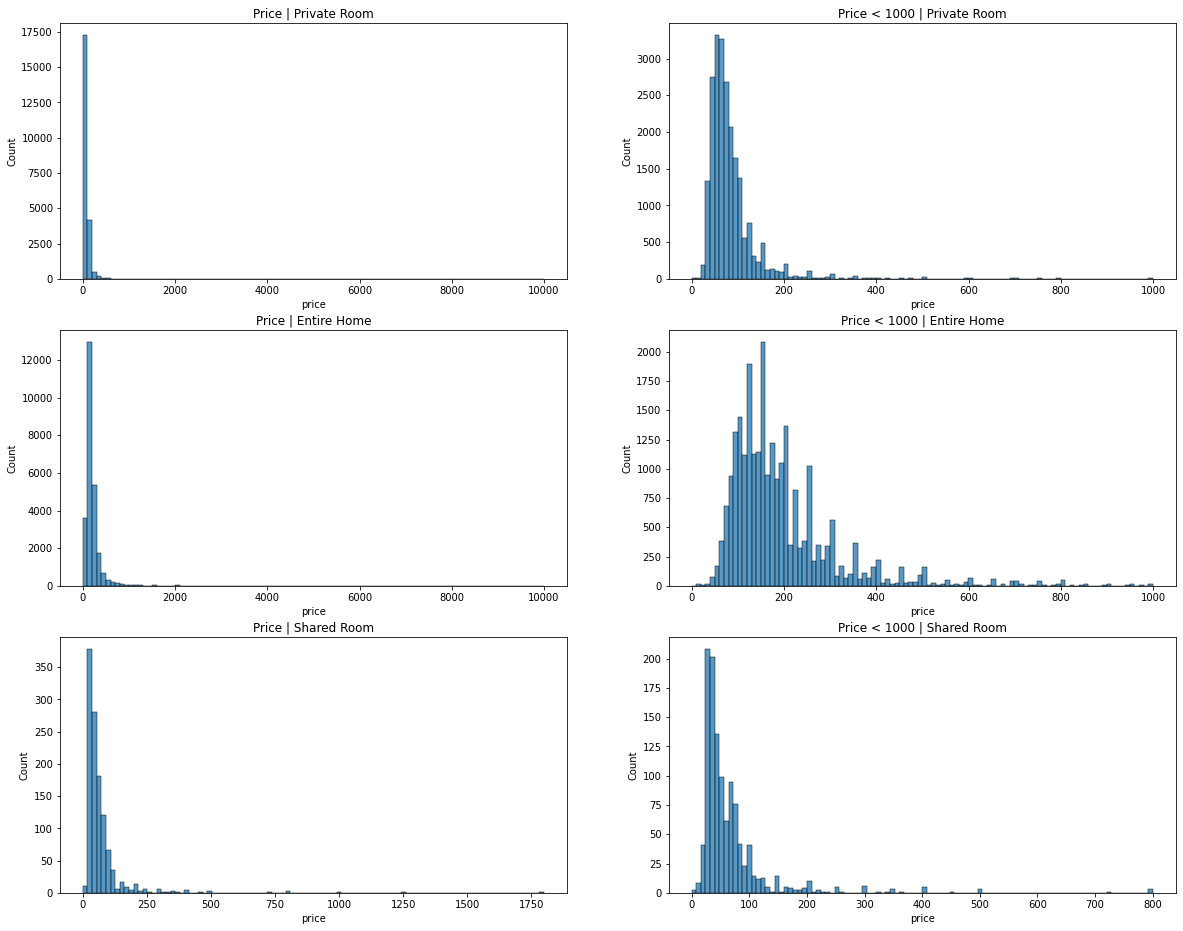

In [10]:
fig = plt.subplots(3, 2, figsize = (20, 16))

plt.subplot(3, 2, 1)
sns.histplot(data = private_room_df, x = 'price', bins = 100)
plt.title('Price | Private Room')

plt.subplot(3, 2, 2)
sns.histplot(data = private_room_df[private_room_df['price'] < 1000], x = 'price', bins = 100)
plt.title('Price < 1000 | Private Room')

plt.subplot(3, 2, 3)
sns.histplot(data = entire_home_df, x = 'price', bins = 100)
plt.title('Price | Entire Home')

plt.subplot(3, 2, 4)
sns.histplot(data = entire_home_df[entire_home_df['price'] < 1000], x = 'price', bins = 100)
plt.title('Price < 1000 | Entire Home')

plt.subplot(3, 2, 5)
sns.histplot(data = shared_room_df, x = 'price', bins = 100)
plt.title('Price | Shared Room')

plt.subplot(3, 2, 6)
sns.histplot(data = shared_room_df[shared_room_df['price'] < 1000], x = 'price', bins = 100)
plt.title('Price < 1000 | Shared Room')

plt.show()

Nhận xét: Quan sát biểu đồ trên kết hợp với điều kiện giá trị mean lớn hơn giá trị median cho ta thấy dữ liệu về giá phòng của từng loại phòng đều lệch phải khá nhiều.

### 3. Mô tả số lượng missing value của mỗi thuộc tính

Với mỗi cột có trong tập dữ liệu, ta sẽ tính số lượng giá trị thiếu. Sau đó ta sẽ lưu giá trị này vào dataframe `missing_values_df` thành 1 dòng là "num_missing_values".

In [11]:
def num_missing_values(col):
  return col.isnull().sum()

missing_values_df = df.agg([num_missing_values]).T
missing_values_df

,num_missing_values
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


### 4. Tính tỷ lệ % missing value của mỗi thuộc tính

Với mỗi cột có trong tập dữ liệu, ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100). Sau đó ta sẽ lưu giá trị này vào dataframe `missing_values_df` thành 1 dòng là "ratio_missing_values".

In [12]:
def ratio_missing_values(col):
  return col.isna().mean()*100

missing_values_df = df.agg([ratio_missing_values]).T
missing_values_df

,ratio_missing_values
id,0.000000
name,0.032723
host_id,0.000000
host_name,0.042949
neighbourhood_group,0.000000
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,0.000000


### 5. Xử lý dữ liệu missing (nhóm sinh viên tự đề xuất giữa remove hoặc fill giá trị missing value). GIải thích lý do

Vì các cột missing value này không ảnh hưởng tới nhóm room_type nên ta sẽ xử lý tại df sau đó sẽ đổ lại vào "private_room", "entire_room" , "share_room"
Cách xử lý missing value:
- Cột "name", "host_name" chiếm tỉ lệ phần trăm missing value thấp nên ít ảnh hưởng nhiều. Vì vậy, ta có thể bỏ qua xử lý missing value.
- Cột "reviews_per_month" chiếm tỉ lệ phần trăm missing value cao nên sẽ có xuất hiện nhiều outlier. Vì vậy, ta sẽ thay bằng giá trị xuất hiện nhiều nhất (mode).
- Cột "last review" là dữ liệu chuỗi thời gian. Ta sẽ thay bằng giá trị lớn nhất (max) hay là ngày gần nhất.


Bỏ đi các dòng có chứa giá trị NaN ở các cột "name", "host_name".

In [13]:
df = df.dropna(subset=['name', 'host_name'])

Thay thế giá trị NaN của cột "reviews_per_month" bằng giá trị xuất hiện nhiều nhất (mode).

In [14]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mode()[0])

Thay thế giá trị NaN của cột "last_review" bằng giá trị lớn nhất (max). Nhưng trước tiên, ta cần thay đổi kiểu dữ liệu của cột "last_review" sang kiểu dữ liệu dạng datetime.

In [15]:
df['last_review'] = df['last_review'].astype('datetime64')
df['last_review'] = df['last_review'].fillna(df['last_review'].max())

Xem thử thông tin của các cột dữ liệu sau khi đã xử lý missing values.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights                  48858 non-null  int64         
 11  nu

Các cột đều đã điền đầy đủ missing values.

### 6. Outlier: sử dụng đồ thị boxplot để quan sát cột Price có tồn tại outlier không?

Ta sẽ vẽ biểu đồ boxplot của cột "price" để xác định giá phòng có đang phân phối xung quanh trung tâm hay cách xa trung tâm. Trong đó:
- Các cận bên trái và bên phải tương ứng với giá trị nhỏ nhất (min) và giá trị lớn nhất (max) của dữ liệu.
- Các cạnh bên trái và bên phải của hình hộp tương ứng với khoảng tứ phân vị thứ nhất (Q1) và khoảng tứ phân vị thứ 3 (Q3).
- Đường ở giữa hình hộp tương ứng với giá trị trung bình (mean).
- Các chấm còn lại nằm ở bên ngoài cận bên trái và cận bên phải là các outlier xuất hiện trong tập dữ liệu.

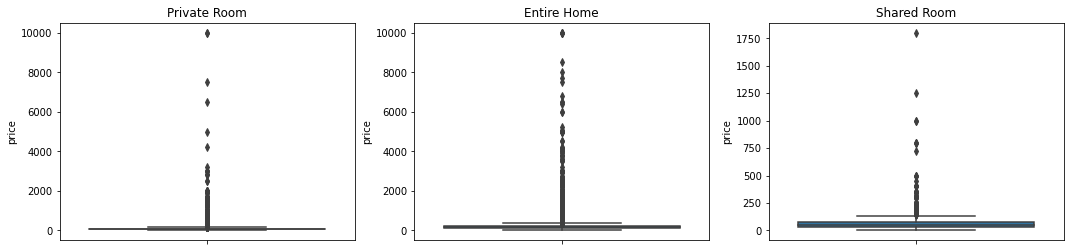

In [17]:
fig = plt.subplots(1, 3, figsize = (18, 4))

plt.subplot(1, 3, 1)
sns.boxplot(y = private_room_df['price'])
plt.title('Private Room')

plt.subplot(1, 3, 2)
sns.boxplot(y = entire_home_df['price'])
plt.title('Entire Home')

plt.subplot(1, 3, 3)
sns.boxplot(y = shared_room_df['price'])
plt.title('Shared Room')

plt.show()

Nhận xét: Quan sát biểu đồ trên, ta thấy dữ liệu của cột "price" có xuất hiện nhiều outlier nằm ở phía bên phải.

Trên thực tế, ta kiểm tra được tính chính xác về giá phòng cao nhất theo từng loại phòng trên trang web chính thức của Airbnb. Cụ thể: 
- Private Room ~ 1000
- Entire Home ~ 1000
- Share Room ~ 700

Do đó, ta sẽ điều chỉnh các giá trị vượt ngưỡng giá phòng cao nhất về lại cho đúng giá phòng trên thực tế để loại bỏ outlier.

In [18]:
private_room_df.loc[private_room_df['price'] > 1000, 'price'] = 1000
entire_home_df.loc[entire_home_df['price'] > 1000, 'price'] = 1000
shared_room_df.loc[shared_room_df['price'] > 700, 'price'] = 700

# Visualize dữ liệu dạng bảng hoặc đồ thị

### 1. Có bao nhiêu “neighbourhood_group”, liệt kê không trùng danh sách này. Lập bảng thống kê gồm "neighbourhood_group", tần suất, % lượt thuê phòng của mỗi "neighbourhood_group"

Có bao nhiêu "neighbourhood_group"?

In [19]:
df['neighbourhood_group'].nunique()

5

Liệt kê các "neighbourhood_group" không trùng danh sách này.

In [20]:
df['neighbourhood_group'].unique().tolist()

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

Lập bảng thống kê gồm "neighbourhood_group", tần suất, % lượt thuê phòng của mỗi "neighbourhood_group".

In [21]:
neighbourhood_group_df = df['neighbourhood_group'].value_counts().to_frame().rename(columns = { 'neighbourhood_group': 'num_neighbourhood_group' })
neighbourhood_group_df['ratio_neighbourhood_group'] = neighbourhood_group_df['num_neighbourhood_group'] / neighbourhood_group_df['num_neighbourhood_group'].sum() * 100
neighbourhood_group_df

,num_neighbourhood_group,ratio_neighbourhood_group
Manhattan,21643,44.297761
Brooklyn,20089,41.117115
Queens,5664,11.592779
Bronx,1089,2.228908
Staten Island,373,0.763437


### 2. Có bao nhiêu "room_type", liệt kê không trùng. Lập bảng thống kê "room_type", tần suất và % lượt thuê cho từng "room_type". Vẽ bar chart để so sánh

Có bao nhiêu "room_type"?

In [22]:
df['room_type'].nunique()

3

Liệt kê các "room_type" không trùng danh sách này.

In [23]:
df['room_type'].unique().tolist()

['Private room', 'Entire home/apt', 'Shared room']

Lập bảng thống kê gồm "room_type", tần suất, % lượt thuê cho từng "room_type".

In [24]:
room_type_df = df['room_type'].value_counts().to_frame().rename(columns = { 'room_type': 'num_room_type' })
room_type_df['ratio_room_type'] = room_type_df['num_room_type'] / room_type_df['num_room_type'].sum() * 100
room_type_df

,num_room_type,ratio_room_type
Entire home/apt,25393,51.973065
Private room,22306,45.654755
Shared room,1159,2.372181


Vẽ bar chart để so sánh.

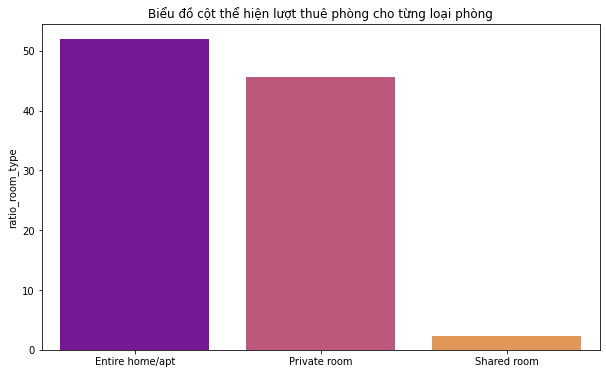

In [25]:
plt.figure(figsize = (10, 6))
sns.barplot(x = room_type_df.index, y = room_type_df['ratio_room_type'], palette = 'plasma')
plt.title('Biểu đồ cột thể hiện lượt thuê phòng cho từng loại phòng')
plt.show()

Nhận xét: Loại phòng có số lượt thuê từ cao xuống thấp là: Entire home/apt, Private room, Shared room.

### 3. Giá trung bình mỗi đêm là bao nhiêu?

Giá trung bình mỗi đêm của từng loại phòng.

In [26]:
print('Giá trung bình mỗi đêm của Private Room là:  ', private_room_df['price'].mean())
print('Giá trung bình mỗi đêm của Entire Home là:   ', entire_home_df['price'].mean())
print('Giá trung bình mỗi đêm của Shared Room là:   ', shared_room_df['price'].mean())

Giá trung bình mỗi đêm của Private Room là:   86.64637642210876
Giá trung bình mỗi đêm của Entire Home là:    200.6512259435633
Giá trung bình mỗi đêm của Shared Room là:    67.90775862068965


### 4. Có sự khác biệt gì giữa lưu trú tại Shared Room và Entire Home giữa các vùng lân cận?

Ta kiểm tra xem mô hình có phân phối chuẩn bằng cách vẽ biểu đồ histogram cho 2 loại phòng: Shared Room và Entire Home. Trong đó:
- Biến định lượng: "price".
- Biến định tính: "room_type" và "neighbourhood_group".

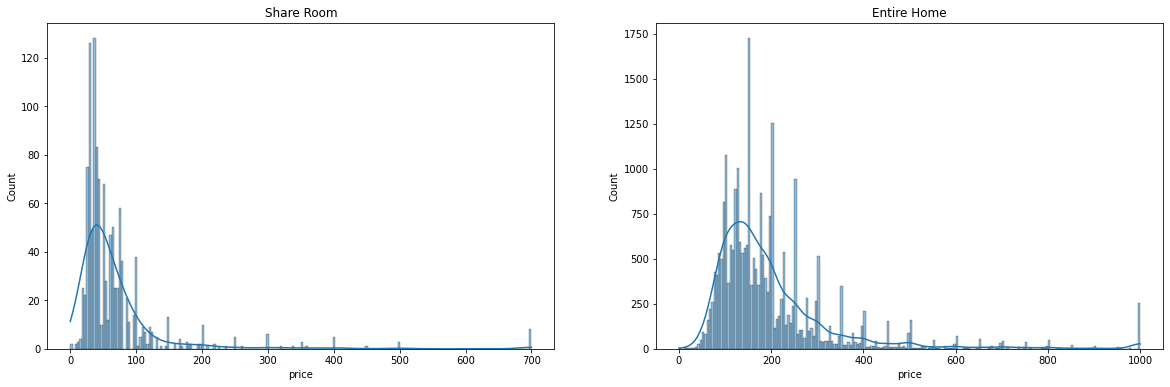

In [27]:
fig = plt.subplots(1, 2, figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.histplot(data = shared_room_df, x = 'price', bins = 200, kde = True)
plt.title('Share Room')

plt.subplot(1, 2, 2)
sns.histplot(data = entire_home_df, x = 'price', bins = 200, kde = True)
plt.title('Entire Home')

plt.show()

Nhận xét: Quan sát 2 biểu đồ histogram trên, ta thấy cả 2 biểu đồ đều không theo phân phối chuẩn nên ta không thể dùng kiểm định giả thuyết ANOVA test để xác định sự khác biệt về lưu trú tại Shared Home và Entire Room giữa các vùng lân cận.

Cách khác, ta thử so sánh giá phòng trung bình giữa 2 tập dữ liệu: `shared_room_df` và `entire_home_df`.

In [28]:
df[df['room_type'].isin(['Shared room', 'Entire home/apt'])].groupby(['room_type', 'neighbourhood_group'])['price'].mean().to_frame()

price
room_type       neighbourhood_group            
Entire home/apt Bronx                127.645503
                Brooklyn             178.415995
                Manhattan            249.251782
                Queens               147.172233
                Staten Island        173.846591
Shared room     Bronx                 58.610169
                Brooklyn              50.527845
                Manhattan             89.391667
                Queens                69.020202
                Staten Island         57.444444

Sau đó, vẽ biểu đồ barplot để so sánh giá phòng trung bình giữa 2 loại phòng: Shared Room và Entire Home của giữa vùng lân cận. Trong đó:
- Trục tung: giá phòng ("price").
- Trục hoành: các vùng lân cận ("neighbourhood_group").

Các màu sắc thể hiện các loại phòng:
- Màu xanh: Entire Home
- Màu vàng: Shared Room

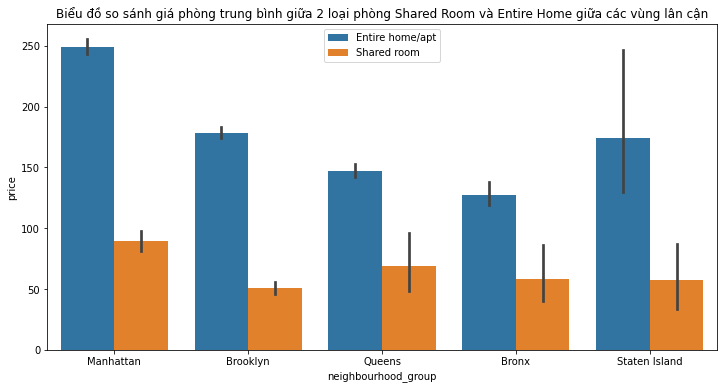

In [29]:
plt.figure(figsize = (12, 6))
sns.barplot(data = df[df['room_type'].isin(['Shared room', 'Entire home/apt'])], x = 'neighbourhood_group', y = 'price', hue = 'room_type')
plt.title('Biểu đồ so sánh giá phòng trung bình giữa 2 loại phòng Shared Room và Entire Home giữa các vùng lân cận')
plt.legend()
plt.show()

Nhận xét: Dựa vào biểu đồ trên, ta có thể kết luận rằng có sự khác biệt về giá phòng giữa lưu trú tại Shared Room và Entire Home giữa các vùng lân cận.

### 5. Giá trung bình cho các Private room như thế nào? Liệt kê bảng dữ liệu và vẽ biểu đồ so sánh

Giá trung bình cho các Private room như thế nào?

In [30]:
private_room_df['price'].mean()

86.64637642210876

Liệt kê bảng dữ liệu.

In [31]:
private_room_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0


Vẽ biểu đồ so sánh.

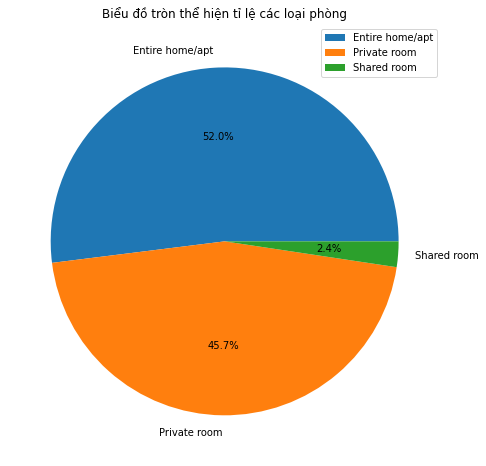

In [32]:
plt.figure(figsize = (8, 8))
plt.pie(room_type_df['ratio_room_type'], labels = room_type_df.index, autopct= '%1.1f%%')
plt.title('Biểu đồ tròn thể hiện tỉ lệ các loại phòng')
plt.legend()
plt.show()

Nhận xét: Entire Home chiếm tỉ lệ cao nhất **(52%)** và Shared Room chiếm tỉ lệ thấp nhất **(2.4%)**.

### 6. Vùng nào là nơi lưu trú rẻ nhất?

Vùng nào là nơi lưu trú rẻ nhất?

In [33]:
cheapest_neighbourhood_df = df.groupby('neighbourhood')['price'].mean().to_frame()
cheapest_neighbourhood_df[cheapest_neighbourhood_df['price'] == cheapest_neighbourhood_df['price'].min()].index[0]

"Bull's Head"

### 7. Giá trung bình của từng loại phòng ở các vùng lân cận?

Giá trung bình của từng loại phòng ở các vùng lân cận.

In [34]:
df.groupby(['room_type','neighbourhood_group'])['price'].mean().to_frame()

price
room_type       neighbourhood_group            
Entire home/apt Bronx                127.645503
                Brooklyn             178.415995
                Manhattan            249.251782
                Queens               147.172233
                Staten Island        173.846591
Private room    Bronx                 66.957055
                Brooklyn              76.533340
                Manhattan            116.842468
                Queens                71.802967
                Staten Island         62.292553
Shared room     Bronx                 58.610169
                Brooklyn              50.527845
                Manhattan             89.391667
                Queens                69.020202
                Staten Island         57.444444

Sau đó, vẽ biểu đồ barplot để so sánh giá phòng trung bình giữa 3 loại phòng: Private Room, Entire Home và Shared Room giữa các vùng lân cận. Trong đó:
- Trục tung: giá phòng ("price").
- Trục hoành: các vùng lân cận ("neighbourhood_group").

Các màu sắc thể hiện các loại phòng:
- Màu xanh dương: Private Room
- Màu vàng: Entire Home
- Màu xanh lá: Shared Room

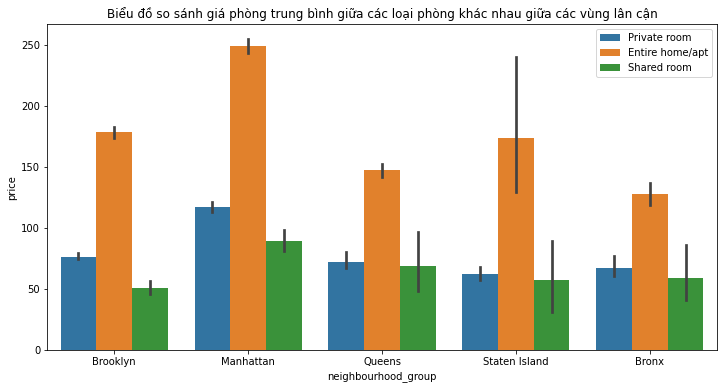

In [35]:
plt.figure(figsize = (12, 6))
sns.barplot(data = df, x = 'neighbourhood_group', y = 'price', hue = 'room_type')
plt.title('Biểu đồ so sánh giá phòng trung bình giữa các loại phòng khác nhau giữa các vùng lân cận')
plt.legend()
plt.show()

Nhận xét: Giá trung bình của Entire Home là lớn nhất, sau đó tới Shared Room và cuối cùng là Private Room.

# Kết luận các điểm chính quan sát được từ dữ liệu

Các điểm chính quan sát được từ dữ liệu:
- Private Room, Shared Room, Entire Home là 3 loại phòng khác nhau và chúng không có ảnh hưởng gì nhau.
- Loại phòng Entire Home có giá phòng trung bình cao hơn các loại phòng còn lại. Ngược lại, loại phòng Shared Room có phòng giá trung bình thấp hơn các loại phòng còn lại.
- Trong các vùng lân cận, vùng có vị trí đắt đỏ nhất là Manhattan, các vùng còn lại có giá phòng khá tương đồng nhau.